### Create directory and upload urls file into your server

In [1]:
from fastai import *
from fastai.vision import *
%load_ext autoreload
%autoreload 2

## Download images

In [2]:
# Data Hirerachy, want to build two classifier, first only classify igneous/sedimentary/metamorphic, second will classify which rock type it is, ie. granite/non-granite/whateveritis....
# I get the hirerachy from https://geology.com/rocks/ and scrape image from google
# source 

In [3]:
search_dict = {
    'Igneous Rock': [
        'Andesite',
        'Basalt',
        'Dacite',
        'Quartz',
        'Diorite',
        'Gabbro',
        'Granite',
        'Obsidian',
        'Pegmatite',
        'Peridotite',
        'Pumice',
        'Rhyolite',
        'Scoria',
        'Tuff',
        'Unakite ',
    ],
    'Metamorphic Rock': [
        'Amphibolite',
        'Gneiss',
        'Gneiss',
        'Hornfels',
        'Lapis Lazuli',
        'Marble',
        'Mariposite',
        'Novaculite',
        'Phyllite',
        'Quartzite ',
        'Schist',
        'Skarn',
        'Slate',
        'Soapstone ',
    ],
    'Sedimentary Rock': [
        'Breccia',
        'Caliche',
        'Caliche',
        'Chert',
        'Coal Rock',
        'Conglomerate ',
        'Diatomite',
        'Dolomite',
        'Flint',
        'Iron Ore',
        'Limestone',
        'Oil Sands',
        'Rock Salt',
        'Sandstone',
        'Shale',
        'Siltstone',
    ]
}

In [4]:
import requests
from bs4 import BeautifulSoup
import urllib
import json

In [5]:
def get_search_string_dict(search_dict):
    
    search_string_dict = {}
    
    for key, keywords_list in search_dict.items():
        for i, keyword in enumerate(keywords_list):
            tmp = keywords_list[i]
            tmp_list = keywords_list.copy()
            tmp_list.remove(tmp_list[i])
        
            search_string = tmp + ' -' + ' -'.join([f'"{keyword}"' for keyword in tmp_list]) + f' :"{key}"' # to make precise search, filter unwanted result, and give good context
            search_string_dict[keyword] = search_string
    return search_string_dict

In [6]:
def get_page(search_string):
    base_url = 'https://www.google.com/search?tbm=isch&q='
    header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"
    }
    page = requests.request('GET', base_url + search_string, headers=header, allow_redirects=True)
    return page

In [7]:
def extract_text(x):
    return dict(json.loads(x.text))['ou']

In [8]:
def get_images_urls(page):
    soup = BeautifulSoup(page.content)
    html = soup.select('.rg_di .rg_meta')
    urls =  list(map(extract_text, html))
    return urls      

In [9]:
search_string_dict = get_search_string_dict(search_dict);

In [10]:
classes = []
for key in search_string_dict.keys():
    classes.append(key)
classes[-2:]
    

['Shale', 'Siltstone']

In [11]:
search_string_dict[classes[0]]

'Andesite -"Basalt" -"Dacite" -"Quartz" -"Diorite" -"Gabbro" -"Granite" -"Obsidian" -"Pegmatite" -"Peridotite" -"Pumice" -"Rhyolite" -"Scoria" -"Tuff" -"Unakite " :"Igneous Rock"'

In [12]:
path = Path('data/rocks')
path.mkdir(exist_ok=True)

In [152]:
for bar,key in enumerate(progress_bar(classes)):
    
    search_string_base = search_string_dict[key]
    urls_list = []
    for i in range(1,10):
        x = f'&ijn={i}&start={i}00'
        x = search_string_base + x;
        x = get_page(x)

        urls = get_images_urls(x)    
        urls = pd.DataFrame(urls)
        urls_list.append(urls)
#         print(urls.shape)
        
    urls_list = pd.concat(urls_list, axis=0)
    print(urls_list.shape)
    urls_list.to_csv(path/f'{key}.txt', index=False, header=False) # To match the format for download_images.

    # import time
    # time.sleep(5) # Delays for 5 seconds. If you are doing a lot of scraping, try not to scrape too fast.

(439, 1)
(498, 1)
(516, 1)
(652, 1)
(426, 1)
(492, 1)
(598, 1)
(490, 1)
(558, 1)
(448, 1)
(392, 1)
(539, 1)
(482, 1)
(493, 1)
(557, 1)
(566, 1)
(620, 1)
(435, 1)
(567, 1)
(588, 1)
(87, 1)
(329, 1)
(474, 1)
(563, 1)
(421, 1)
(648, 1)
(485, 1)
(617, 1)
(594, 1)
(562, 1)
(624, 1)
(490, 1)
(549, 1)
(604, 1)
(510, 1)
(680, 1)
(630, 1)
(511, 1)
(718, 1)
(504, 1)
(533, 1)
(540, 1)
(642, 1)


# Data Scraping 
Images are scraped from Google Image. 
download_images() Credit to Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In [14]:
i = 0

In [ ]:
for _,class_name in enumerate(classes[i:]): 
    
    folder = class_name
    file = f'{class_name}.txt'
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    print(file)
    download_images(path/file, dest, max_pics=200, max_workers=6)
    # To keep track of i, so I can re-run the cell if it stuck at 99% sometimes.
    # If i interupt the process, re-run this cell should start at the last class that I am downloading.
    i = i + 1

Basalt.txt


Error https://c8.alamy.com/comp/EE94D7/hand-drawn-outline-illustration-of-an-amygdaloidal-basalt-rock-EE94D7.jpg 'content-length'
Error "https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_limit,w_695/v1512348873/snnyuts4j6gynyxnxojk.jpg" No connection adapters were found for '"https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_limit,w_695/v1512348873/snnyuts4j6gynyxnxojk.jpg"'
Error https://www.maxpixel.net/static/photo/1x/Basalt-Mineral-Rock-Mountain-Igneous-Rock-Hill-3622277.jpg 'content-length'
Error https://images.locanto.net/Wholesale-Rock-and-Mineral-Samples-and-Collection-Kits/vap_3608332300.jpg 'content-length'
Error https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2016/06/09/103702779-117090.530x298.JPG?v=1465491637 'content-length'
Error https://c8.alamy.com/comp/EE94D6/single-cartoon-of-amygdaloidal-basalt-rock-over-blue-EE94D6.jpg 'content-length'
Error https://collections.nmnh.si.edu/media/?action=10&irn=10246646&height=640&width=640 

Good! Let's take a look at some of our pictures then.

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=4)

## View data

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c

## Train model

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1-rocks')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

In [ ]:
learn.save('stage-2-rocks')

In [ ]:
learn.load('stage-2-rocks')

## Interpretation

In [234]:
interp = ClassificationInterpretation.from_learner(learn)

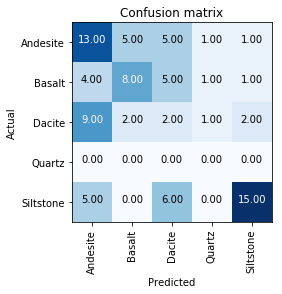

In [235]:
interp.plot_confusion_matrix()

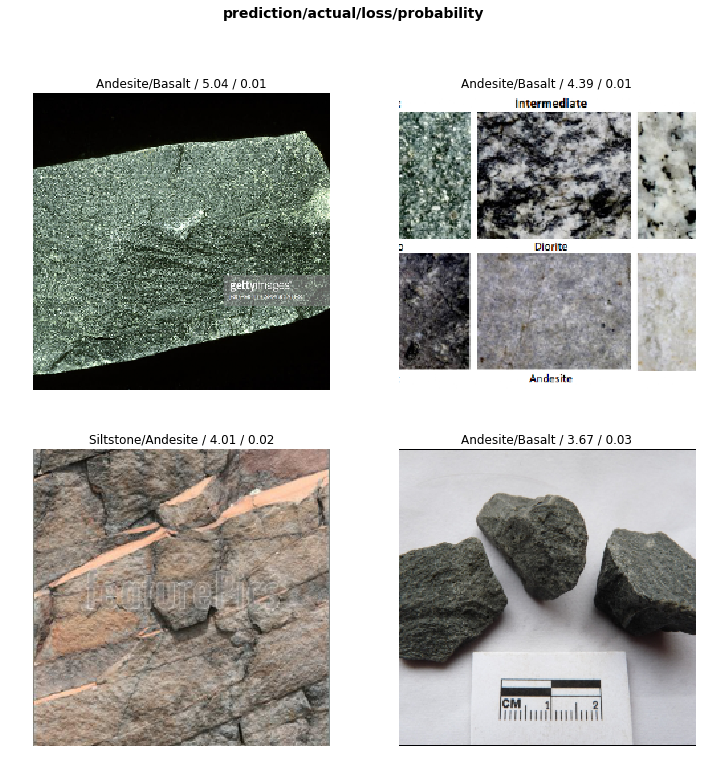

In [236]:
interp.plot_top_losses(4)

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [237]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

Now we can pass in these paths to our widget.

In [238]:
fd = FileDeleter(file_paths=top_loss_paths)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

## Putting your model in production

In [239]:
data.classes

['Andesite', 'Basalt', 'Dacite', 'Quartz', 'Siltstone']

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [240]:
# fastai.defaults.device = torch.device('cpu')

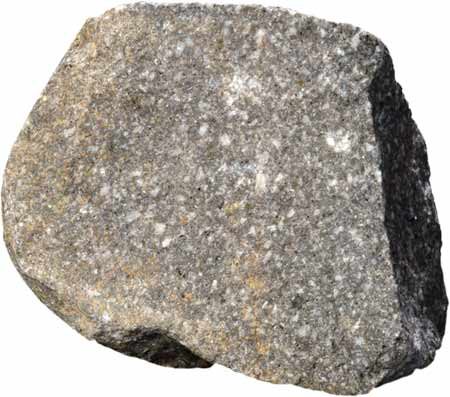

In [243]:
img = open_image(path/'Andesite'/'00000001.jpg')
img

In [246]:
data.classes

['Andesite', 'Basalt', 'Dacite', 'Quartz', 'Siltstone']

In [248]:
classes = ['Andesite', 'Basalt', 'Dacite', 'Quartz', 'Siltstone']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2-rocks')

In [249]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'Andesite'

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [88]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [87]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:12
epoch  train_loss  valid_loss  error_rate     
1      19.205343   80275072.000000  0.737179    (00:12)



### Learning rate (LR) too low

In [89]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [90]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:04
epoch  train_loss  valid_loss  error_rate
1      1.846892    1.460822    0.692308    (00:12)
2      1.822263    1.449666    0.685897    (00:12)
3      1.818573    1.452975    0.660256    (00:12)
4      1.806075    1.466667    0.653846    (00:13)
5      1.804038    1.476455    0.679487    (00:13)



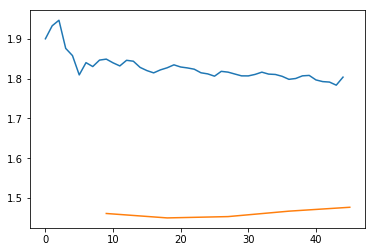

In [91]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [105]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [106]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      1.271487    0.711475    0.280255    (00:14)



### Too many epochs

In [107]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [108]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [111]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 07:22
epoch  train_loss  valid_loss  error_rate
1      1.517631    1.572828    0.802288    (00:12)
2      1.546593    1.550419    0.826797    (00:11)
3      1.545142    1.528509    0.815359    (00:11)
4      1.478895    1.492109    0.790850    (00:10)
5      1.433474    1.442667    0.728758    (00:10)
6      1.337803    1.386668    0.679739    (00:10)
7      1.270900    1.327418    0.642157    (00:11)
8      1.200847    1.269937    0.591503    (00:11)
9      1.121168    1.216577    0.545752    (00:10)
10     1.029964    1.176654    0.519608    (00:11)
11     0.959061    1.140666    0.488562    (00:11)
12     0.887489    1.114502    0.480392    (00:10)
13     0.824836    1.097068    0.470588    (00:10)
14     0.767771    1.091737    0.464052    (00:11)
15     0.717235    1.086249    0.465686    (00:11)
16     0.665047    1.078649    0.449346    (00:10)
17     0.620755    1.081273    0.446078    (00:11)
18     0.578923    1.082510    0.444444    (00:11)
19     0.551266    1.0